# Final Pipeline for YOLO

### Preparing Data - 

First to prepare **Boilerplate Code**. Which typically include loading the data and calling inference.

In [ ]:
# checking GPU information, need a GPU
!nvidia-smi

Thu Feb  4 04:54:28 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# changing tensorflow version to 2.3.1
!pip install tensorflow==2.3.1

In [ ]:
# make sure to check tensorflow version to 2.3.1 and keras version to 2.4.3
import tensorflow
import keras

print(tensorflow.__version__)
print(keras.__version__)

2.3.1
2.4.3


## Loading Data

In [ ]:
# copying yolo_data.tar.gz to colab environment
!cp -r '/content/drive/MyDrive/RDD/YOLO/yolo_data.tar.gz' '/content/'

In [ ]:
# setting path
%cd /content/

# extracting tar file
!tar -xvf  'yolo_data.tar.gz'

Streaming output truncated to the last 5000 lines.
YOLOv3/Data/Source_Images/Training_Images/files_to_train/Japan_008226.jpg
YOLOv3/Data/Source_Images/Training_Images/files_to_train/India_007146.jpg
YOLOv3/Data/Source_Images/Training_Images/files_to_train/Japan_003384.jpg
YOLOv3/Data/Source_Images/Training_Images/files_to_train/India_003292.jpg
YOLOv3/Data/Source_Images/Training_Images/files_to_train/Japan_003471.jpg
YOLOv3/Data/Source_Images/Training_Images/files_to_train/Japan_002527.jpg
YOLOv3/Data/Source_Images/Training_Images/files_to_train/Japan_009676.jpg
YOLOv3/Data/Source_Images/Training_Images/files_to_train/Japan_004423.jpg
YOLOv3/Data/Source_Images/Training_Images/files_to_train/Japan_000839.jpg
YOLOv3/Data/Source_Images/Training_Images/files_to_train/India_009698.jpg
YOLOv3/Data/Source_Images/Training_Images/files_to_train/Japan_008170.jpg
YOLOv3/Data/Source_Images/Training_Images/files_to_train/Czech_002447.jpg
YOLOv3/Data/Source_Images/Training_Images/files_to_train/Czec

Copying best saved **model weights** and **data classes**.

In [ ]:
# copying saved model weights
!cp -r '/content/drive/MyDrive/RDD/YOLO/trained_weights_final.h5' '/content/YOLOv3/Data/Model_Weights'

In [ ]:
# copying saved data classes
!cp -r '/content/drive/MyDrive/RDD/YOLO/data_classes.txt' '/content/YOLOv3/Data/Model_Weights'

## Inference

In [ ]:
# setting path
%cd /content/YOLOv3/Inference/

# this function is going to take the saved model from /content/YOLOv3/Data/Model_Weights
# and test images from /content/YOLOv3/Data/Source_Images/Test_Images
# create bounding box on top of almost every test image and save them to /content/YOLOv3/Data/Source_Images/Test_Image_Detection_Results and
# one more thing it is also saving a csv file Detection_Results.csv to the same destination folder
!python Detector.py

Streaming output truncated to the last 5000 lines.
Time spent: 0.040sec
/content/YOLOv3/Data/Source_Images/Test_Images/India_001278.jpg
(416, 416, 3)
Found 1 boxes for img
D00 0.26 (435, 516) (541, 679)
Time spent: 0.040sec
/content/YOLOv3/Data/Source_Images/Test_Images/Japan_010503.jpg
(416, 416, 3)
Found 1 boxes for img
D20 0.53 (275, 375) (423, 488)
Time spent: 0.045sec
/content/YOLOv3/Data/Source_Images/Test_Images/India_001832.jpg
(416, 416, 3)
Found 1 boxes for img
D20 0.75 (258, 566) (581, 692)
Time spent: 0.040sec
/content/YOLOv3/Data/Source_Images/Test_Images/India_008446.jpg
(416, 416, 3)
Found 1 boxes for img
D40 0.39 (505, 427) (537, 447)
Time spent: 0.039sec
/content/YOLOv3/Data/Source_Images/Test_Images/Japan_011650.jpg
(416, 416, 3)
Found 2 boxes for img
D40 0.62 (179, 496) (225, 526)
D20 0.89 (2, 379) (324, 600)
Time spent: 0.039sec
/content/YOLOv3/Data/Source_Images/Test_Images/Japan_011094.jpg
(416, 416, 3)
Found 1 boxes for img
D20 0.58 (4, 491) (598, 592)
Time spent

In [ ]:
# setting path
%cd /content/YOLOv3/Data/Source_Images/

# importing libaries
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

import imageio
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

# Size, in inches, of the output images.
IMAGE_SIZE = (16, 8)

/content/YOLOv3/Data/Source_Images


In [ ]:
# collecting all test jpg files
image_list = []
for file in os.listdir('Test_Image_Detection_Results'):
  if 'jpg' in file:
    image_list.append(file)

print(len(image_list))

2439


In [ ]:
# reading test images dataset
# just to get bounding box annotations
testset = pd.read_csv('/content/YOLOv3/Data/Source_Images/Test_Images/Annotations-export-test.csv')
testset.head()

image  xmin  ymin  xmax  ymax label
0  Japan_003482.jpg   218   392   379   598   D20
1  Japan_003482.jpg    44   379   117   427   D20
2  Japan_004480.jpg   221   329   416   597   D20
3  Japan_004480.jpg   142   346   194   387   D20
4  Czech_002182.jpg   187   453   216   520   D00

## Final Pipeline Function

In [ ]:
def final(imgs):
  '''
  This function is taking one or more image names and return a pair of images (original and predicted).
  input : single image or multiple images (String)
  output : a pair of images (original and predicted)
  '''
  for each_image in imgs:
    # for original image
    grouped = testset.groupby('image')
    group_df = grouped.get_group(each_image)
    group_df = group_df.reset_index()
    group_df = group_df.drop(['index'], axis=1)
    bb_array = group_df.drop(['image', 'label'], axis=1).values
    img_arr = imageio.imread('/content/YOLOv3/Data/Source_Images/Test_Images/' + each_image)
    bbs = BoundingBoxesOnImage.from_xyxy_array(bb_array, shape=img_arr.shape)
    
    # for predicted image
    image = cv2.imread('/content/YOLOv3/Data/Source_Images/Test_Image_Detection_Results/' + each_image, cv2.IMREAD_UNCHANGED)

    # plotting them using matplotlib subplots
    plt.figure(figsize=IMAGE_SIZE)
    
    plt.subplot(121)
    plt.title('Actual Image')
    plt.imshow(bbs.draw_on_image(img_arr, size=1))

    plt.subplot(122)
    plt.title('Predicted Image')
    plt.imshow(image)

### Calling Pipeline Function for single image

In [ ]:
import random

# selecting some random images
# the implementation will also work for any number of images, whether it's 1 or n
random_imgs = random.sample(image_list, 1)
random_imgs

['Japan_012858.jpg']

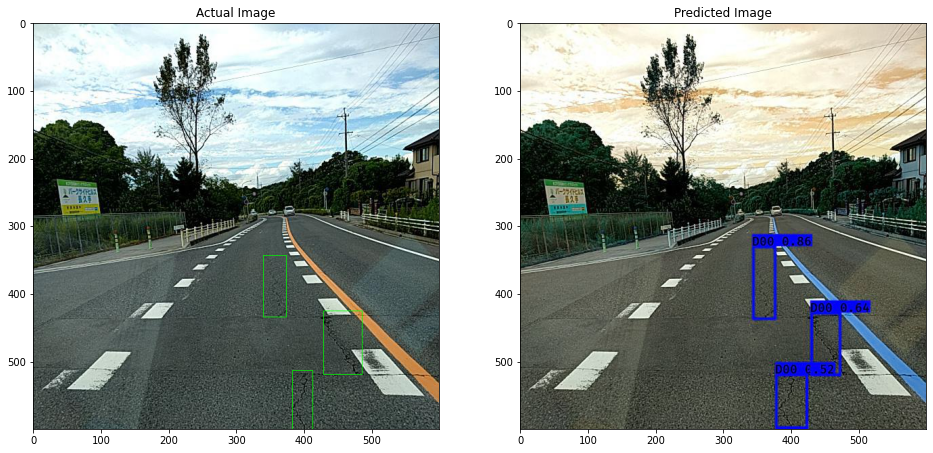

In [ ]:
# calling the pipeline function
final(random_imgs)

### Calling Pipeline Function for multiple images

In [ ]:
import random

# selecting some random images
# the implementation will also work for any number of images, whether it's 1 or n
random_imgs = random.sample(image_list, 10)
random_imgs

['Japan_003207.jpg',
 'Czech_002932.jpg',
 'Japan_007495.jpg',
 'Czech_000976.jpg',
 'Japan_010399.jpg',
 'Japan_008939.jpg',
 'Japan_005893.jpg',
 'Japan_012452.jpg',
 'Czech_003242.jpg',
 'Japan_007612.jpg']

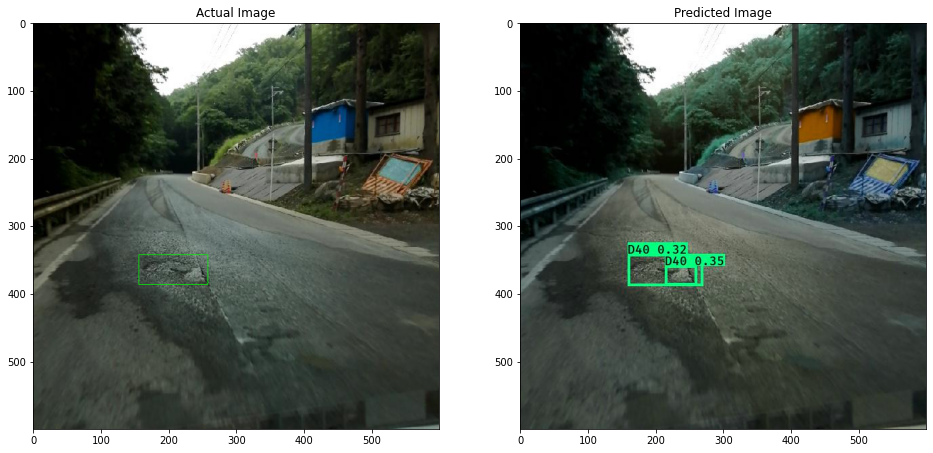

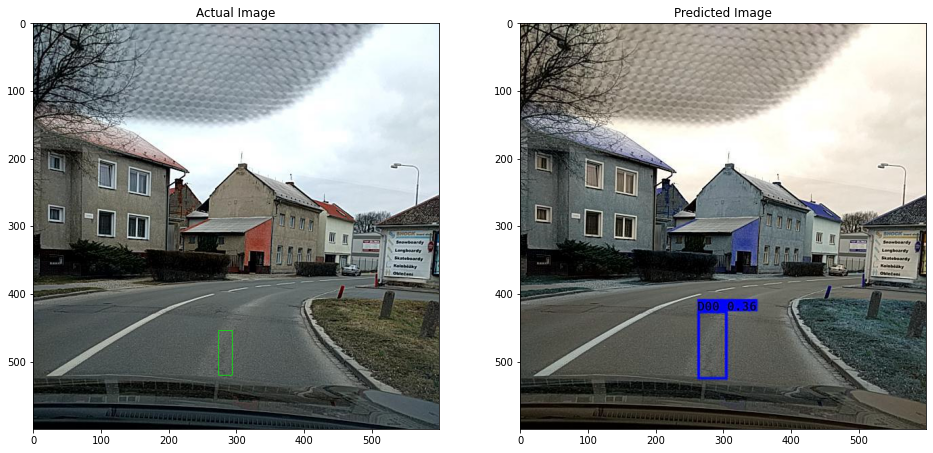

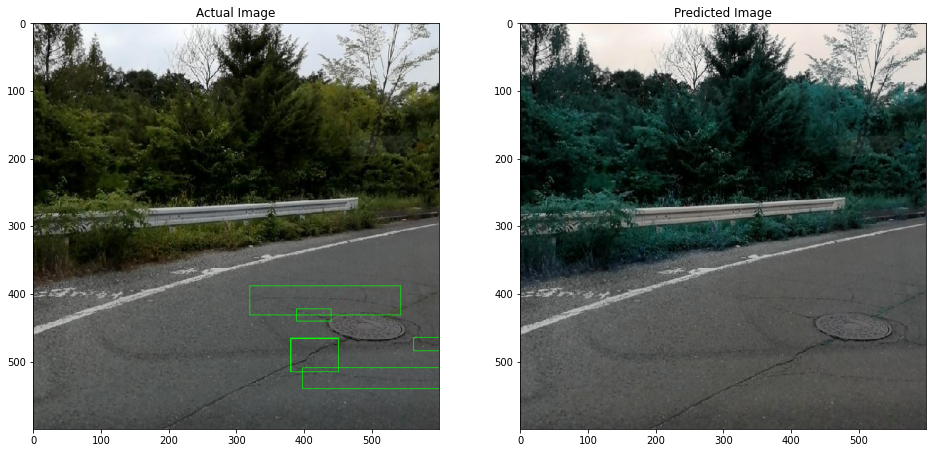

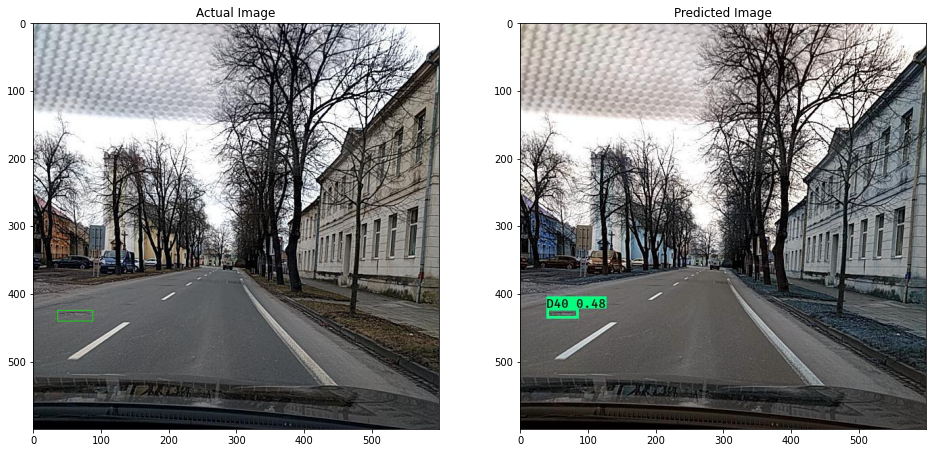

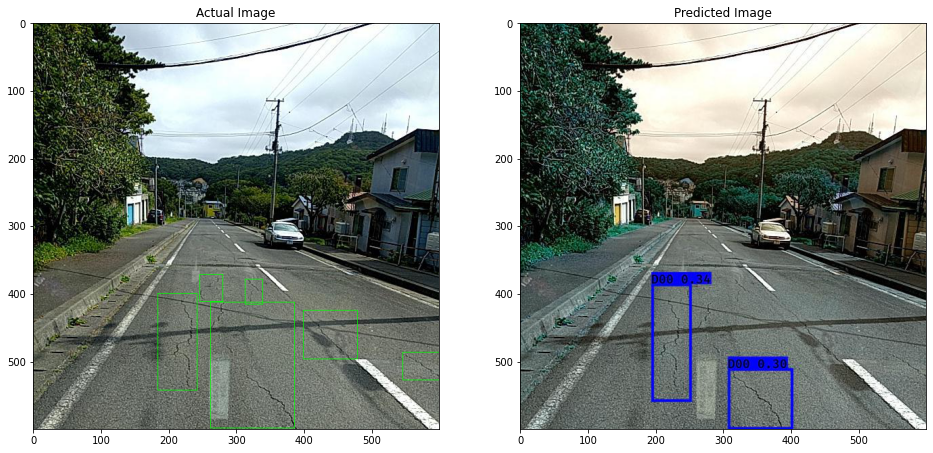

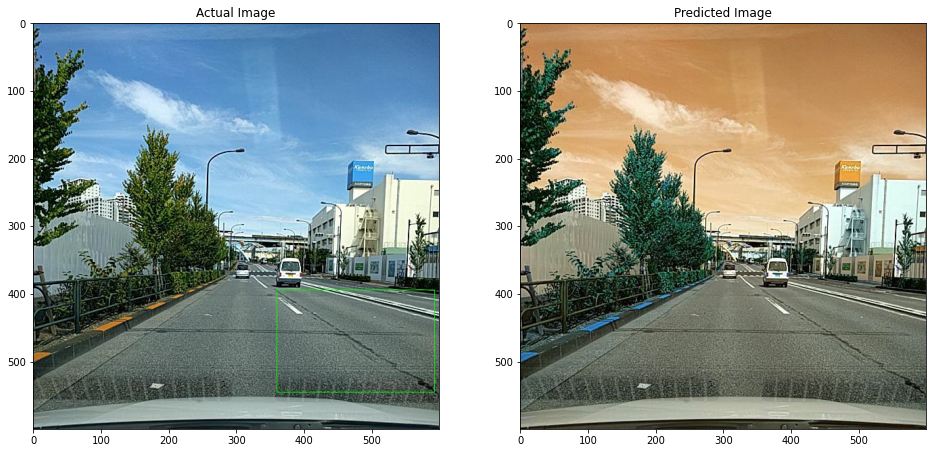

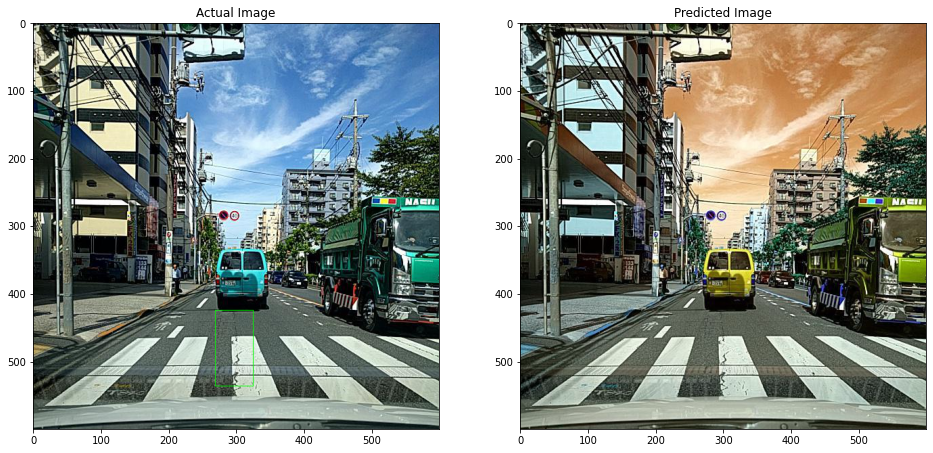

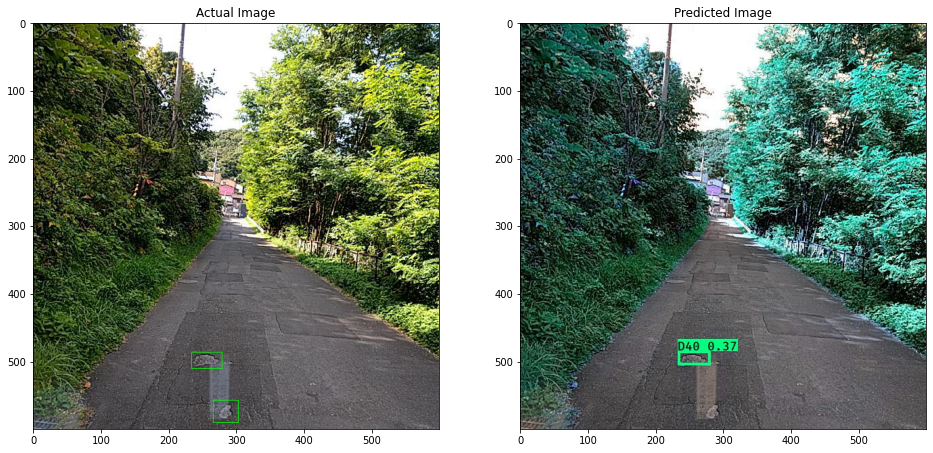

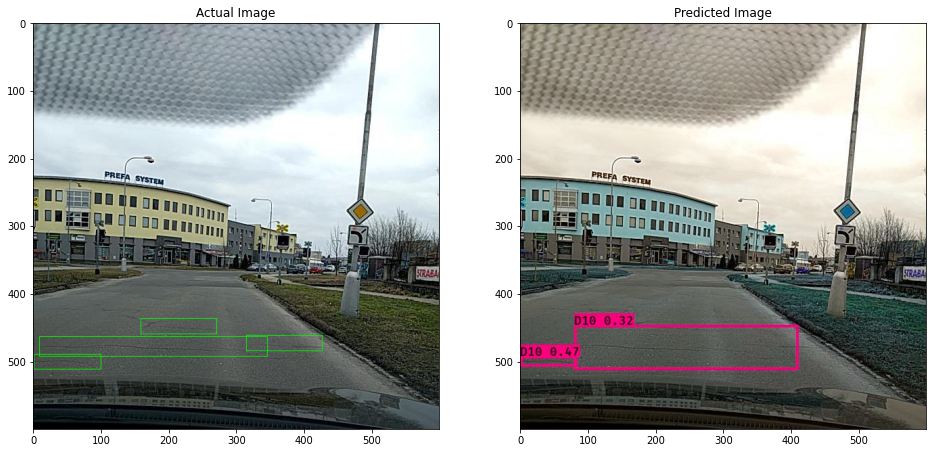

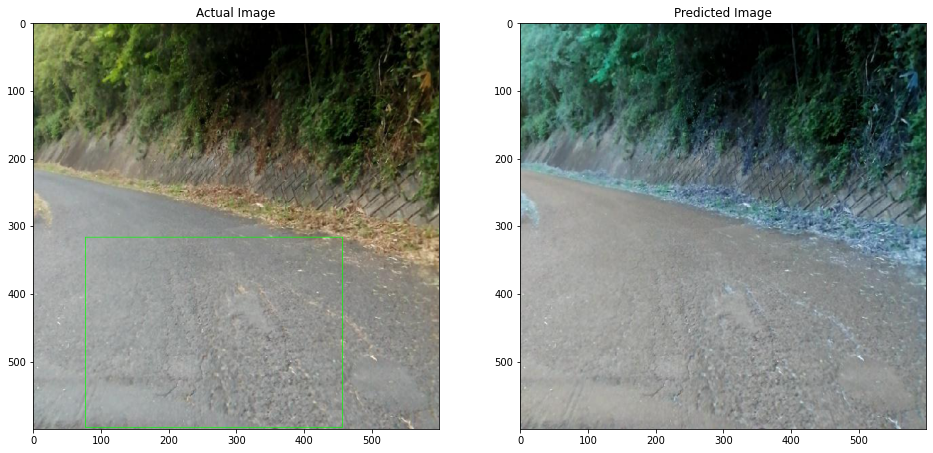

In [ ]:
# calling the pipeline function
final(random_imgs)

## Conclusion for YOLO v3 model - 

The YOLO v3 model is working fine. I tested it for so many images and it just worked well. Also there's a need of improvement. For some of the damage categories like D40, D10 and D20 it is good for most of the cases. But for the damage category D10 it is not working so good. And a lot of images where bounding boxes are not present have D20 as damage type.


## Future Work - 

1. Since I worked in the Google Colab, where with the GPU we have time restrictions. So training of this model for more epochs can improve the detection accuracy.
2. Need some more data, for that I have already augumented images. But to train with these many images can exhaust our limited resources. So in future this will be another work to perform.